# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
info = pd.merge(mouse_metadata,study_results,how="right",on=["Mouse ID","Mouse ID"])

# Display the data table for preview
info.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [4]:
# Checking the number of mice.
number_of_mice = len(info["Mouse ID"].unique())
number_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
info_duplicate = info[["Mouse ID","Timepoint"]]
info_duplicate["Mouse ID & Timepoint"] = info_duplicate["Mouse ID"].astype(str) + info_duplicate["Timepoint"].astype(str)
duplicated_list = info_duplicate.duplicated(subset=["Mouse ID & Timepoint"])
duplicated_list = list(duplicated_list)
index_list = []
for i in range(len(duplicated_list)):
    if duplicated_list[i] == True:
        index_list.append(i)
duplicate_id = info.iloc[index_list]["Mouse ID"].unique()
duplicate_id

C:\Users\Peter\AppData\Local\Temp\ipykernel_21224\359501152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_duplicate["Mouse ID & Timepoint"] = info_duplicate["Mouse ID"].astype(str) + info_duplicate["Timepoint"].astype(str)


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id_frame = info.loc[info["Mouse ID"] == 'g989']
duplicate_id_frame

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = info.loc[info["Mouse ID"] != 'g989']
cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = len(cleaned["Mouse ID"].unique())
number_of_mice_cleaned

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_cut = cleaned[["Drug Regimen","Tumor Volume (mm3)"]]

clean_mean = cleaned_cut.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
clean_mean = clean_mean.to_frame()
clean_mean = clean_mean.reset_index()
clean_median = cleaned_cut.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
clean_median = clean_median.to_frame()
clean_median = clean_median.reset_index()
clean_variance = cleaned_cut.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
clean_variance = clean_variance.to_frame()
clean_variance = clean_variance.reset_index()
clean_std = cleaned_cut.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
clean_std = clean_std.to_frame()
clean_std = clean_std.reset_index()
clean_sem = cleaned_cut.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
clean_sem = clean_sem.to_frame()
clean_sem = clean_sem.reset_index()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary = pd.merge(clean_mean,clean_median,how="left",on=["Drug Regimen","Drug Regimen"])
summary = pd.merge(summary,clean_variance,how="left",on=["Drug Regimen","Drug Regimen"])
summary = pd.merge(summary,clean_std,how="left",on=["Drug Regimen","Drug Regimen"])
summary = pd.merge(summary,clean_sem,how="left",on=["Drug Regimen","Drug Regimen"])
summary = summary.set_index("Drug Regimen")
summary.columns = ["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev.","Tumor Volume Std. Err."]
summary

C:\Users\Peter\AppData\Local\Temp\ipykernel_21224\584106523.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Tumor Volume (mm3)_x'} in the result is deprecated and will raise a MergeError in a future version.
  summary = pd.merge(summary,clean_std,how="left",on=["Drug Regimen","Drug Regimen"])


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

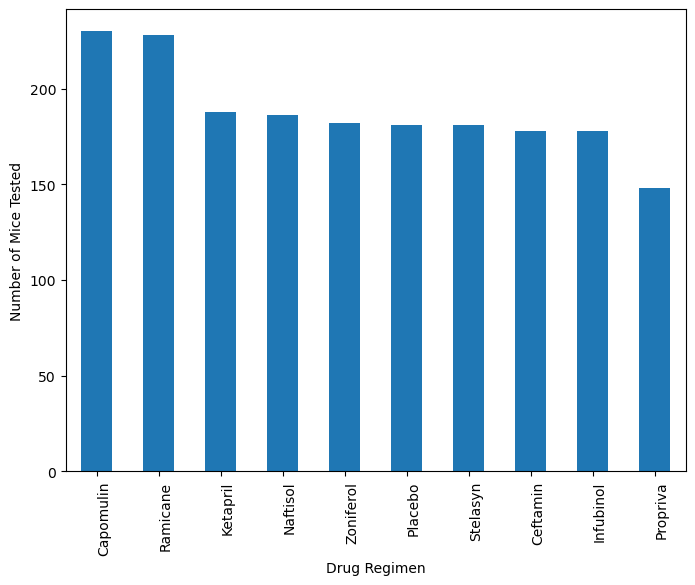

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
cleaned_timepoints = cleaned[["Timepoint","Drug Regimen"]]
cleaned_timepoints_grouped = cleaned_timepoints.groupby("Drug Regimen").count()
cleaned_timepoints_grouped = cleaned_timepoints_grouped.reset_index()
cleaned_timepoints_grouped = cleaned_timepoints_grouped.sort_values(by = "Timepoint",ascending = False)
# cleaned_timepoints_grouped
figure1 = cleaned_timepoints_grouped.plot(kind="bar",figsize=(8,6),
                                          xlabel = "Drug Regimen",ylabel="Number of Mice Tested",legend=False)
xticklabels = cleaned_timepoints_grouped["Drug Regimen"]
figure1.set_xticklabels(xticklabels,rotation = 90,rotation_mode="anchor",ha = "right",wrap = True)
plt.show

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

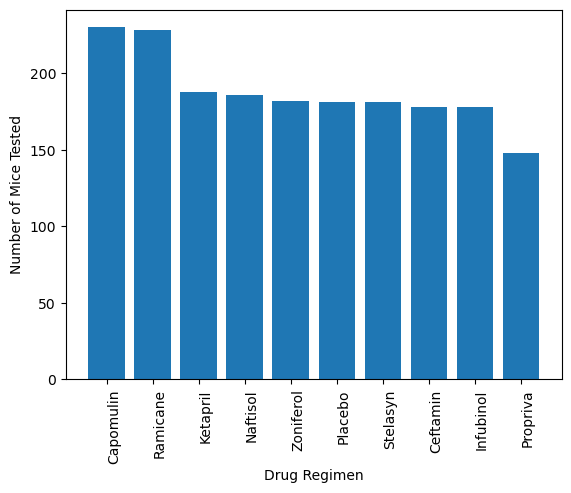

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(cleaned_timepoints_grouped["Drug Regimen"],cleaned_timepoints_grouped["Timepoint"],align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90, ha='right',wrap = True)

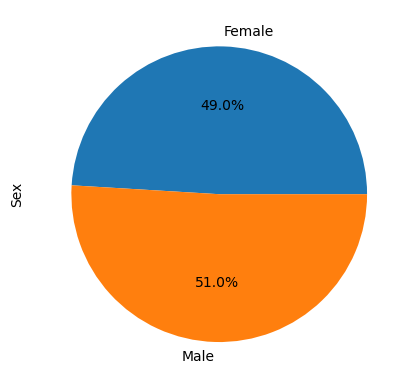

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_sex = cleaned[["Sex","Mouse ID"]]
cleaned_sex_grouped = cleaned_sex.groupby(["Sex"]).count()

figure2 = cleaned_sex_grouped.plot(kind="pie",ylabel="Sex",autopct='%1.1f%%',subplots=True,legend=False)

([<matplotlib.patches.Wedge at 0x1959c4f7e20>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

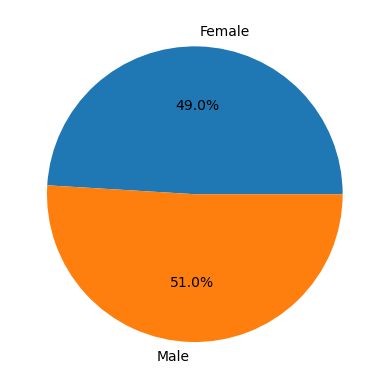

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
cleaned_sex_grouped = cleaned_sex_grouped.reset_index()
plt.pie(cleaned_sex_grouped["Mouse ID"],labels =cleaned_sex_grouped["Sex"],autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
cleaned_volumn = cleaned[["Mouse ID","Timepoint","Drug Regimen","Tumor Volume (mm3)"]]
cleaned_volumn_grouped = cleaned_volumn.groupby("Mouse ID")["Timepoint"].agg("max")
cleaned_volumn_grouped.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleaned_volumn_grouped_merg = pd.merge(cleaned_volumn_grouped,info,how="left",left_on=["Mouse ID","Timepoint"],right_on=["Mouse ID","Timepoint"])
cleaned_volumn_grouped_merg

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tmv = cleaned_volumn_grouped_merg.loc[cleaned_volumn_grouped_merg["Drug Regimen"]==treatment,:]["Tumor Volume (mm3)"]
    tmv_list = list(tmv)
    tmv.reset_index()
    # add subset 
    tumor_vol.append(tmv_list)
    
    # Determine outliers using upper and lower bounds
    iqr = st.iqr(tmv_list)
    q1 = np.percentile(tmv_list, 25)
    q3 = np.percentile(tmv_list, 75)
    outlier_lower = q1 - 1.5 * iqr
    outlier_higher = q3 + 1.5 * iqr
    
    Sample = cleaned_volumn_grouped_merg.loc[cleaned_volumn_grouped_merg["Drug Regimen"]==treatment,:]
    outlier_tumer_volumes = Sample.loc[(Sample["Tumor Volume (mm3)"] < outlier_lower) | (Sample["Tumor Volume (mm3)"] > outlier_higher),:]["Tumor Volume (mm3)"]
    
    print(f"{treatment}'s IQR is {iqr}, {treatment}'s potential outlier is {str(outlier_tumer_volumes)}")
  

Capomulin's IQR is 7.781863460000004, Capomulin's potential outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR is 9.098536719999998, Ramicane's potential outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's IQR is 11.477135160000003, Infubinol's potential outlier is 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's IQR is 15.577752179999997, Ceftamin's potential outlier is Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumer Volume (mm3)')

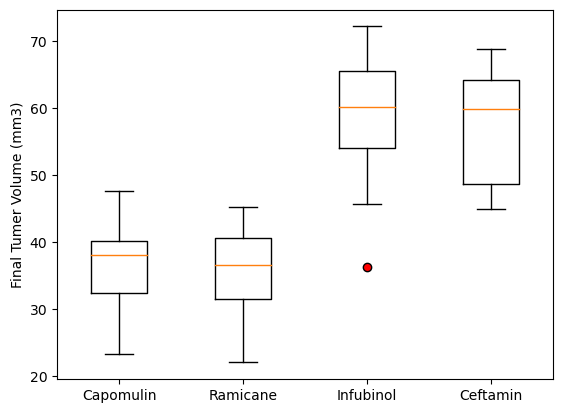

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol,labels=treatments,flierprops=dict(markerfacecolor='r', marker='o', label='not shown'))
plt.ylabel("Final Tumer Volume (mm3)")

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse b128')

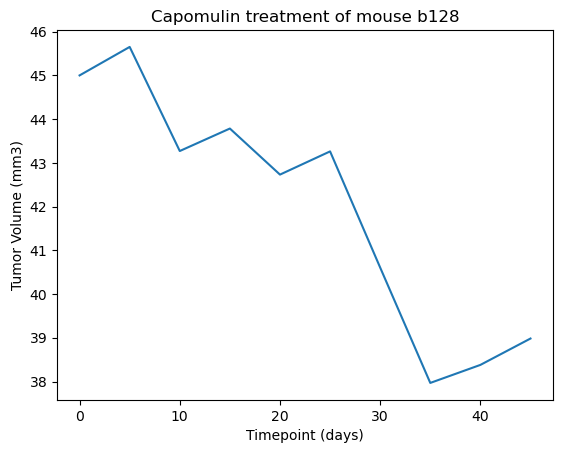

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_sample = cleaned.loc[cleaned["Drug Regimen"]=="Capomulin",:][["Mouse ID","Tumor Volume (mm3)","Timepoint"]]
capomulin_sample
b128_sample = capomulin_sample.loc[capomulin_sample["Mouse ID"] == "b128",:]
plt.plot(b128_sample["Timepoint"],b128_sample["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse b128")

Text(0.5, 0, 'Weight (g)')

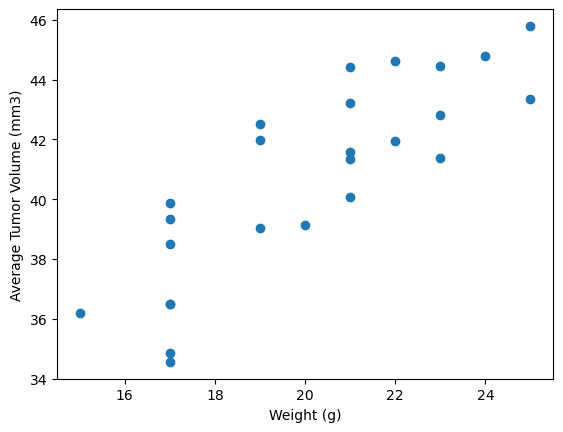

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_sample1 = cleaned.loc[cleaned["Drug Regimen"]=="Capomulin",:][["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]
capomulin_sample1_weight = capomulin_sample1.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].agg("mean")
capomulin_sample1_weight = capomulin_sample1_weight.reset_index()
plt.plot(capomulin_sample1_weight["Weight (g)"],capomulin_sample1_weight["Tumor Volume (mm3)"],'o')
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


Text(0.5, 0, 'Weight (g)')

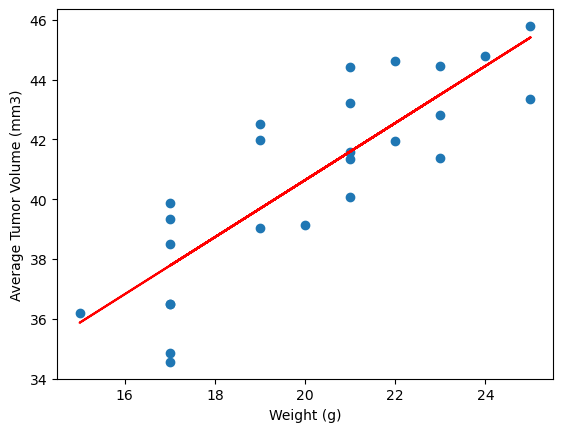

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

slope, intercept, r, p, std_err = st.linregress(list(capomulin_sample1_weight["Weight (g)"]), list(capomulin_sample1_weight["Tumor Volume (mm3)"]))
print(f"The correlation between mouse weight and the average tumor volume is {r}")

expected_volume = [intercept + slope * i for i in list(capomulin_sample1_weight["Weight (g)"])]
plt.plot(capomulin_sample1_weight["Weight (g)"],capomulin_sample1_weight["Tumor Volume (mm3)"],'o')
plt.plot(capomulin_sample1_weight["Weight (g)"],expected_volume, color="red")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

